In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

num_words = 10000
max_review_len = 100
csv_path = '../build/data3.csv'
model_save_path = '../build/best_model.h5'

In [12]:
train = pd.read_csv(csv_path)
reviews = train['review']

In [13]:
y_train = train['helpful']
y_train

0        0
1        1
2        0
3        0
4        0
        ..
65539    1
65540    1
65541    0
65542    1
65543    0
Name: helpful, Length: 65544, dtype: int64

In [14]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(reviews)
with open('../build/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
#check
sequences = tokenizer.texts_to_sequences(reviews)
x_train = pad_sequences(sequences, maxlen=max_review_len)
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  589,
           4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

In [16]:
#net
model = Sequential()
model.add(Embedding(num_words, 2, input_length=max_review_len))
model.add(SimpleRNN(8))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
checkpoint_callback = ModelCheckpoint(model_save_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [19]:
history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[checkpoint_callback])

c:\users\a\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 58989 samples, validate on 6555 samples
Epoch 1/5
58989/58989 [==============================] - 31s 520us/step - loss: 0.6745 - accuracy: 0.5645 - val_loss: 0.6287 - val_accuracy: 0.6606

Epoch 00001: val_accuracy improved from -inf to 0.66056, saving model to ../build/best_model.h5
Epoch 2/5
58989/58989 [==============================] - 22s 372us/step - loss: 0.5899 - accuracy: 0.6919 - val_loss: 0.5801 - val_accuracy: 0.7066

Epoch 00002: val_accuracy improved from 0.66056 to 0.70664, saving model to ../build/best_model.h5
Epoch 3/5
58989/58989 [==============================] - 20s 333us/step - loss: 0.5583 - accuracy: 0.7192 - val_loss: 0.6085 - val_accuracy: 0.6680

Epoch 00003: val_accuracy did not improve from 0.70664
Epoch 4/5
58989/58989 [==============================] - 18s 298us/step - loss: 0.5351 - accuracy: 0.7365 - val_loss: 0.6270 - val_accuracy: 0.6494

Epoch 00004: val_accuracy did not improve from 0.70664
Epoch 5/5
58989/58989 [===========================

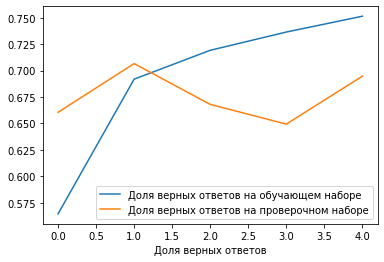

In [20]:
plt.plot(history.history['accuracy'],
         label = "Доля верных ответов на обучающем наборе")
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.xlabel('Доля верных ответов')
plt.legend()
plt.show()

In [21]:
# Load best model
model.load_weights(model_save_path)
with open('../build/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [22]:
text = "Out of all the reviews I wrote This one is probably the most serious one I wrote. For starters the community of this game sucks just like every online game You don't wanna talk to them because they're all just jerks who wanna say you suck or you camped or blah blah blah its rare to get a nice compliment out of people in this game.But you don't have to talk to the community either. Unlike most online games this one doesn't have a mic system so you don't have to worry about hearing a twelve year old cry baby raging at you for nothing. Only time you can talk to people in the game is in the beginning before the match starts if your a survivor and at the end after the match is over as both killer and survivor The end chat is the only one the killer can talk to everyone in the match though"
sequence = tokenizer.texts_to_sequences([text])

sequence

[[55,
  9,
  34,
  1,
  461,
  6,
  2311,
  10,
  49,
  8,
  324,
  1,
  112,
  1142,
  49,
  6,
  2311,
  13,
  4669,
  1,
  127,
  9,
  10,
  4,
  486,
  29,
  33,
  115,
  43,
  4,
  7,
  71,
  694,
  875,
  3,
  90,
  69,
  546,
  34,
  29,
  4081,
  97,
  694,
  142,
  7,
  657,
  36,
  7,
  4358,
  36,
  2717,
  2717,
  2717,
  51,
  1424,
  3,
  25,
  5,
  161,
  55,
  9,
  54,
  12,
  10,
  4,
  16,
  7,
  71,
  18,
  3,
  875,
  3,
  1,
  127,
  345,
  1550,
  112,
  43,
  73,
  10,
  49,
  265,
  18,
  5,
  1905,
  211,
  23,
  7,
  71,
  18,
  3,
  1678,
  70,
  2477,
  5,
  7173,
  330,
  318,
  1649,
  1892,
  3269,
  41,
  7,
  13,
  189,
  66,
  47,
  7,
  30,
  875,
  3,
  54,
  12,
  1,
  4,
  8,
  12,
  1,
  1153,
  193,
  1,
  448,
  1036,
  22,
  28,
  5,
  1020,
  2,
  41,
  1,
  259,
  91,
  1,
  448,
  8,
  105,
  31,
  463,
  559,
  2,
  1020,
  1,
  259,
  643,
  8,
  1,
  66,
  49,
  1,
  559,
  30,
  875,
  3,
  226,
  12,
  1,
  448,
  212]]

In [23]:
data = pad_sequences(sequence, maxlen=max_review_len)
data

array([[ 161,   55,    9,   54,   12,   10,    4,   16,    7,   71,   18,
           3,  875,    3,    1,  127,  345, 1550,  112,   43,   73,   10,
          49,  265,   18,    5, 1905,  211,   23,    7,   71,   18,    3,
        1678,   70, 2477,    5, 7173,  330,  318, 1649, 1892, 3269,   41,
           7,   13,  189,   66,   47,    7,   30,  875,    3,   54,   12,
           1,    4,    8,   12,    1, 1153,  193,    1,  448, 1036,   22,
          28,    5, 1020,    2,   41,    1,  259,   91,    1,  448,    8,
         105,   31,  463,  559,    2, 1020,    1,  259,  643,    8,    1,
          66,   49,    1,  559,   30,  875,    3,  226,   12,    1,  448,
         212]])

In [24]:
result = model.predict(data)
result

array([[0.8051882]], dtype=float32)

In [25]:
print("NO" if result < 0.5 else "YES")

YES


In [26]:
input_path = '../build/input'
f = open(input_path)
input = f.read().split('\n')
f.close()
input

["Out of all the reviews I wrote This one is probably the most serious one I wrote. For starters the community of this game sucks just like every online game You don't wanna talk to them because they're all just jerks who wanna say you suck or you camped or blah blah blah its rare to get a nice compliment out of people in this game.But you don't have to talk to the community either. Unlike most online games this one doesn't have a mic system so you don't have to worry about hearing a twelve year old cry baby raging at you for nothing. Only time you can talk to people in the game is in the beginning before the match starts if your a survivor and at the end after the match is over as both killer and survivor The end chat is the only one the killer can talk to everyone in the match though",
 'My love',
 'I do not like']

In [27]:
sequence = tokenizer.texts_to_sequences(input)

sequence

[[55,
  9,
  34,
  1,
  461,
  6,
  2311,
  10,
  49,
  8,
  324,
  1,
  112,
  1142,
  49,
  6,
  2311,
  13,
  4669,
  1,
  127,
  9,
  10,
  4,
  486,
  29,
  33,
  115,
  43,
  4,
  7,
  71,
  694,
  875,
  3,
  90,
  69,
  546,
  34,
  29,
  4081,
  97,
  694,
  142,
  7,
  657,
  36,
  7,
  4358,
  36,
  2717,
  2717,
  2717,
  51,
  1424,
  3,
  25,
  5,
  161,
  55,
  9,
  54,
  12,
  10,
  4,
  16,
  7,
  71,
  18,
  3,
  875,
  3,
  1,
  127,
  345,
  1550,
  112,
  43,
  73,
  10,
  49,
  265,
  18,
  5,
  1905,
  211,
  23,
  7,
  71,
  18,
  3,
  1678,
  70,
  2477,
  5,
  7173,
  330,
  318,
  1649,
  1892,
  3269,
  41,
  7,
  13,
  189,
  66,
  47,
  7,
  30,
  875,
  3,
  54,
  12,
  1,
  4,
  8,
  12,
  1,
  1153,
  193,
  1,
  448,
  1036,
  22,
  28,
  5,
  1020,
  2,
  41,
  1,
  259,
  91,
  1,
  448,
  8,
  105,
  31,
  463,
  559,
  2,
  1020,
  1,
  259,
  643,
  8,
  1,
  66,
  49,
  1,
  559,
  30,
  875,
  3,
  226,
  12,
  1,
  448,
  212],
 [21, 118],
 [6,

In [28]:
data = pad_sequences(sequence, maxlen=max_review_len)
result = model.predict(data)
result

array([[0.8051882],
       [0.4904506],
       [0.6084673]], dtype=float32)

In [30]:
#result = [1,0,1]
output_path = '../build/output'
f = open(output_path, 'w')
s = "\n".join(map(str, result))
f.write(s)
f.close()
s

ValueError: I/O operation on closed file.